# Import file from google drive

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


 extract the contents of a ZIP file located at "/content/drive/MyDrive/Profile Verif.zip" into the "/tmp/Profile" directory

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Profile Verif.zip", 'r')
zip_ref.extractall("/tmp/Profile")
zip_ref.close()

# Importing Libraries

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np

print the number of images in different directories

In [ ]:
source_path_wedding = '/tmp/Profile/Cartoon'
source_path_birthday = '/tmp/Profile/Mask Face'
source_path_konser = '/tmp/Profile/Valid Face'
source_path_animal = '/tmp/Profile/Animals'
source_path_plant = '/tmp/Profile/Plants'

print(f"There are {len(os.listdir(source_path_wedding))} images of cartoon.")
print(f"There are {len(os.listdir(source_path_birthday))} images of Mask.")
print(f"There are {len(os.listdir(source_path_konser))} images of Valid.")
print(f"There are {len(os.listdir(source_path_animal))} images of Animal.")
print(f"There are {len(os.listdir(source_path_plant))} images of Plant.")

There are 343 images of cartoon.
There are 338 images of Mask.
There are 301 images of Valid.
There are 349 images of Animal.
There are 303 images of Plant.


# Data Preparation

In [ ]:
TRAINING_DIR = "/tmp/Profile"
training_datagen = ImageDataGenerator(rescale=1./255,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      fill_mode='nearest',
                                      validation_split=0.3,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      )
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
num_train_data = train_generator.samples
print("Jumlah dataset pelatihan:", num_train_data)
val_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)
num_val_data = val_generator.samples
print("Jumlah dataset validasi:", num_val_data)


Found 1119 images belonging to 5 classes.
Jumlah dataset pelatihan: 1119
Found 477 images belonging to 5 classes.
Jumlah dataset validasi: 477


retrieve a dictionary mapping the class names to their respective indices in the validation dataset

In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Animals
1 : Cartoon
2 : Mask Face
3 : Plants
4 : Valid Face


visualizing a grid of sample training images along with their corresponding labels.

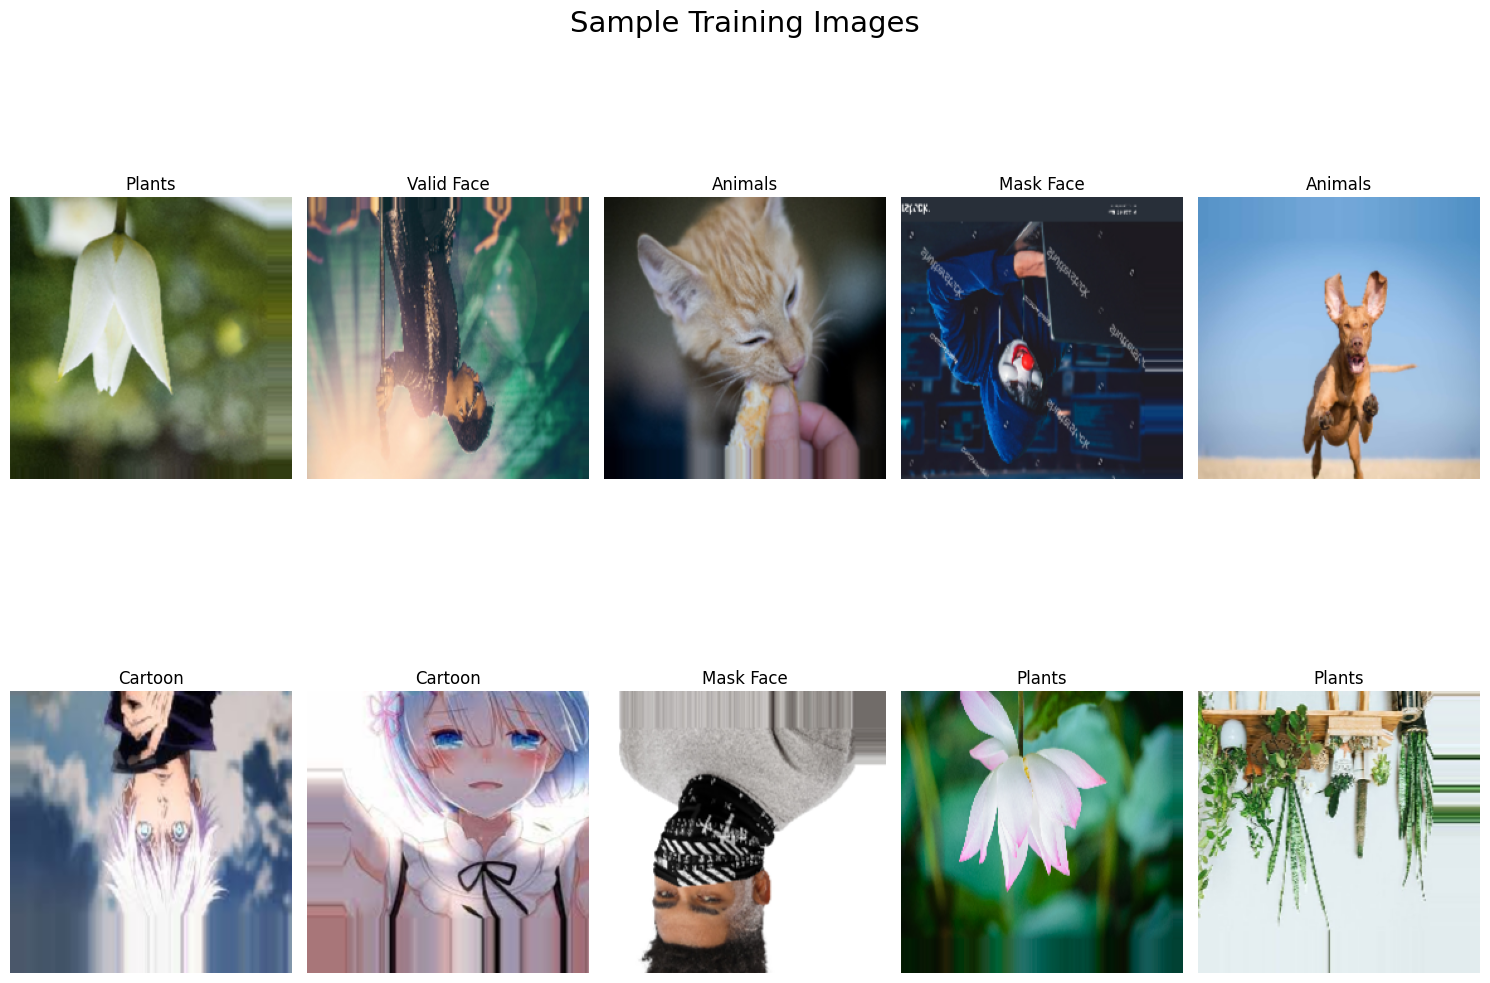

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

# Convolutional neural network (CNN) using TensorFlow and Keras

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3),  activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


display a summary of the architecture and parameters of the defined neural network model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

epoch will end if the accuracy reach more than 0.90 and the val accuracy reach more than 0.75

In [ ]:
class MyCustomCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            if logs['accuracy'] >0.90 and logs['val_accuracy'] >0.75:
                print("Validation accuracy and accuracy is up to 0.83. Stopping training.")
                self.model.stop_training = True

custom_callback = MyCustomCallback()


compile a TensorFlow and Keras model, specifying the loss function, optimizer, and metrics for training and evaluation.

In [ ]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

train the model on a given dataset

In [ ]:
history = model.fit(
        train_generator,
        epochs=100,
        validation_data=val_generator,
        callbacks=[custom_callback]
  )

Epoch 1/100
35/35 [==============================] - 52s 1s/step - loss: 1.4575 - accuracy: 0.3601 - val_loss: 1.3190 - val_accuracy: 0.4759
Epoch 2/100
35/35 [==============================] - 56s 2s/step - loss: 1.2878 - accuracy: 0.4388 - val_loss: 1.4000 - val_accuracy: 0.4193
Epoch 3/100
35/35 [==============================] - 49s 1s/step - loss: 1.2027 - accuracy: 0.5067 - val_loss: 1.1410 - val_accuracy: 0.5136
Epoch 4/100
35/35 [==============================] - 52s 2s/step - loss: 1.1575 - accuracy: 0.5344 - val_loss: 1.0986 - val_accuracy: 0.5639
Epoch 5/100
35/35 [==============================] - 49s 1s/step - loss: 1.0878 - accuracy: 0.5612 - val_loss: 1.1087 - val_accuracy: 0.5660
Epoch 6/100
35/35 [==============================] - 49s 1s/step - loss: 1.0963 - accuracy: 0.5478 - val_loss: 1.0663 - val_accuracy: 0.5786
Epoch 7/100
35/35 [==============================] - 50s 1s/step - loss: 1.0450 - accuracy: 0.5773 - val_loss: 1.0906 - val_accuracy: 0.5514
Epoch 8/100
3

saving the trained TensorFlow and Keras model to a file in the Hierarchical Data Format (HDF5)

In [ ]:
model.save("/content/drive/MyDrive/ModelMuka2249174.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Summary of model history

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

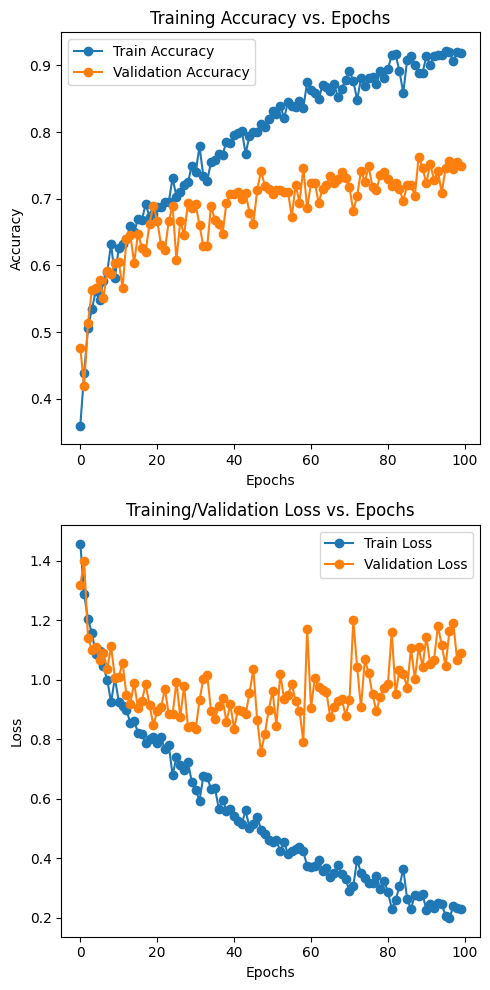

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

# Testing the model

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/ModelMuka2249174.h5')

dataset_path = '/tmp/Profile/'

subfolders = os.listdir(dataset_path)

labels = [
          'Animals',
          'Cartoon',
          'Mask Face',
          'Plants',
          'Valid Face'
]
# Dictionary to store counts per label
label_counts = {label: {'correct': 0, 'incorrect': 0} for label in labels}

for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_path, subfolder)

    # Check if the path is a directory
    if os.path.isdir(subfolder_path):
        # Get the real label from the subfolder name
        real_label = subfolder

        # Iterate through all images in the subfolder
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)

            # Load and preprocess the image
            img = image.load_img(img_path, target_size=(224, 224, 1))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 225

            # Make predictions
            prediction = model.predict(img_array)
            index = np.argmax(prediction)
            predicted_class = labels[index]

            # Check if the prediction is correct
            if predicted_class == real_label:
                label_counts[real_label]['correct'] += 1
            else:
                label_counts[real_label]['incorrect'] += 1

            print(f"Image: {filename}, Real class: {real_label}, Predicted class: {predicted_class}")

# Print the summary per label
for label in labels:
    correct_count = label_counts[label]['correct']
    incorrect_count = label_counts[label]['incorrect']
    total_count = correct_count + incorrect_count
    accuracy = (correct_count / total_count) if total_count > 0 else 0

    print(f"\nLabel: {label}")
    print(f"Correct Predictions: {correct_count}")
    print(f"Incorrect Predictions: {incorrect_count}")
    print(f"Accuracy: {accuracy:.2%}")


1/1 [==============================] - 0s 114ms/step
Image: mask-4977405_960_720-840x493.jpg, Real class: Mask Face, Predicted class: Mask Face
1/1 [==============================] - 0s 27ms/step
Image: AdobeStock_391457742.jpeg, Real class: Mask Face, Predicted class: Valid Face
1/1 [==============================] - 0s 17ms/step
Image: pop202008_mask-culture01.jpg, Real class: Mask Face, Predicted class: Mask Face
1/1 [==============================] - 0s 17ms/step
Image: 1400-20__1__65139.1676715079.jpg, Real class: Mask Face, Predicted class: Mask Face
1/1 [==============================] - 0s 19ms/step
Image: 1140-should-older-people-use-face-mask.jpg, Real class: Mask Face, Predicted class: Cartoon
1/1 [==============================] - 0s 17ms/step
Image: images122.jpg, Real class: Mask Face, Predicted class: Mask Face
1/1 [==============================] - 0s 19ms/step
Image: 106873730-1619444190693-gettyimages-1311873719-20210410-nng_0992_2021041083730875.jpeg, Real class: Mas